### **PREDICTING DISCOUNTED PRICE** 

Since we found out that the Actual price and Discounted price has a positive linear relationship and are  correlated with a correlation coeficient of 0.92 we will therefore use a simple linear regression model to predict discount price  where the Dependant variable will be the Discounted price while the independent variable will be the Actual price 

In [4]:
 # importing necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


In [5]:
df1 = pd.read_csv( 'CLEANED_DATA.csv' )
df2 = pd.read_csv( 'REVIEWERS_DATA.CSV')

In [6]:
 # Setting up the visualization style 
sns.set_style( style = 'darkgrid' )
sns.set_palette( palette = 'icefire' ) 

In [7]:
 # Extracting the dependant and independent variable 
X = df1['Actual_Price'].values.reshape( -1 , 1 )
y = df1['Discounted_Price'].values.reshape( -1 , 1 )

We will then need to split the dataset into training and testing set then we fit a simple linear regression to the training set 

In [8]:
 # Splitting the Dataset 
x_train,x_test,y_train,y_test = train_test_split( X , y ,test_size = 0.2 , random_state = 21 )

 # Fitting the simple linear regression 
reg = LinearRegression()
reg.fit( x_train , y_train )

 # Getting the coeficients 
print(reg.coef_)

 # getting the Intercept 
print(reg.intercept_)

[[0.64053776]]
[4.03610605]


We can see that the coeficient is 0.64 and the y intercept is 4.03 indicating a positive relationship between the variables 

We will then calculate the R-Squared Value 

In [9]:
 # predicting the dependant variable using the x_test
y_pred = reg.predict( x_test )

# Compairing the predictions and the tests
print( 'R2_Score : ', r2_score( y_test , y_pred ))


R2_Score :  0.937312993454616


From the output, we observe that the R-squared value is 0.93731, indicating that approximately 93% of the variation in the Discounted Price can be explained by the Actual Price.

We will now plot a scatter plot with a regression line 

<function matplotlib.pyplot.show(close=None, block=None)>

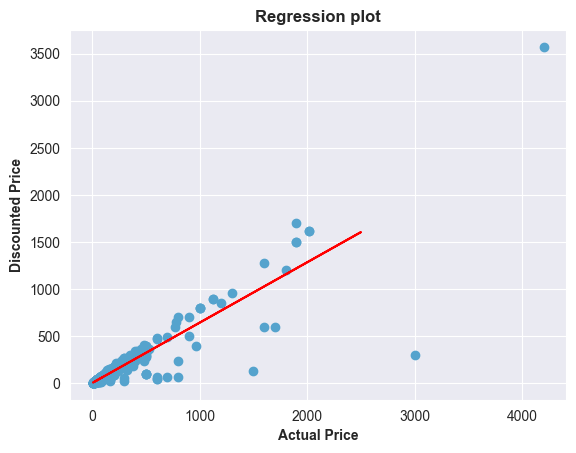

In [10]:
plt.scatter ( x_train , y_train )
plt.plot( x_test , y_pred , color = 'red')

plt.xlabel( 'Actual Price' , fontweight = 'bold' )
plt.ylabel( 'Discounted Price' , fontweight = 'bold' )
plt.title( 'Regression plot' , fontweight = 'bold' )

plt.show

We can see that the Scatter plot indicates a linear relationship between the Actual Price and Discounted Price

Next, we will conduct cross-validation to assess the model's performance and mitigate the risk of overfitting.

In [11]:
 # Dividing the data in 10 folds 
kf = KFold(n_splits=10, shuffle=True, random_state=21)

cv_results = cross_val_score( reg, X, y, cv = kf )

print( 'Cross Validation Results Mean : ' , cv_results.mean() )

Cross Validation Results Mean :  0.7614054537598548


From the cross validation we can see that the mean is 0.76 which means that our model has an average predicting of 76%.

We will now perform regulazization which is a method of preventing overfitting where we will use the lasso and Ridge Regression. 

In [12]:
X1 = df1[['Actual_Price' , 'Rating' , 'Rating_Count']] # Lasso is mostly used with muliple independent variables 
y1 = df1['Discounted_Price']

X1_train , X1_test , y1_train , y1_test = train_test_split( X1 , y1 , random_state = 21 , test_size = 0.3 )

lasso = Lasso( alpha = 0.1 )
lasso.fit( X1_train , y1_train ) # Fitting the Training Data

ridge_predict = lasso.predict( X1_test ) # Predicting using the test data 

print( 'Lasso Score : ' , lasso.score( X1_test , y1_test )) 

print( 'Lasso Coeficients : ' , lasso.coef_ )

Lasso Score :  0.9406377592933026
Lasso Coeficients :  [ 6.38328169e-01 -5.15486795e+01 -4.49189264e-06]


From the output we can see that the score is 0.94 which shows that it predicts 94% of the test data 

In [13]:
ridge = Ridge( alpha = 0.1 )
ridge.fit( X1_train , y1_train ) # Fitting the Training Data

ridge_predict = ridge.predict( X1_test ) # Predicting using the test data 

print( 'Ridge Score : ' , lasso.score( X1_test , y1_test )) 

Ridge Score :  0.9406377592933026


we can see from the output that the ridge score is also 0.94 

We can extend the linear regression model to include multiple independent variables.

In [14]:
reg2 = LinearRegression()
reg2.fit( X1_train , y1_train )

y1_predict = reg2.predict( X1_test )

print( 'R2 Score : ' , r2_score( y1_test , y1_predict ) )

R2 Score :  0.9406231178321915


We can see that the R2 score is 0.94  which is desirable

We will then apply preprocessing using standard scaler 

In [15]:
scaler = StandardScaler()

X2 = df1[['Actual_Price' , 'Rating' , 'Rating_Count']] 
y2 = df1['Discounted_Price']

X2 = scaler.fit_transform( X2 )
X2_train , X2_test , y2_train , y2_test = train_test_split( X2 , y2 , random_state = 21 , test_size = 0.3 )

regss = LinearRegression()
regss.fit( X2_train , y2_train )

y2_pred = regss.predict( X2_test )

print( 'R2 Score : ', r2_score( y2_test , y2_pred ) )

R2 Score :  0.9406231178321304


We can also see that the R2 score is also 0.94

#### **EVALUATING THE LINEAR REGRESSION MODEL**

Linear Regression models rely on several key assumptions to ensure their effectiveness. These assumptions are:

1. Linear Relationship between the dependent and independent variables.
2. Normal Distribution of error components.
3. No Multicollinearity among independent variables.
4. No Heteroscedasticity in the residuals.

Based on our previous Exploratory Data Analysis, we can address two of these assumptions: Linear Relationship and No Multicollinearity. The scatter plot between the Actual Price and the Discounted Price demonstrates a linear relationship, and the heatmap indicates the absence of multicollinearity among the independent variables.

To further assess the model, we will apply Ordinary Least Squares (OLS) regression. OLS is an optimization technique that identifies the optimal set of parameters for the model by minimizing the discrepancy between the model’s predictions and the actual values.

In [16]:
 # getting the data
OLS_DATA = df1[['Discounted_Price' , 'Actual_Price']]

 # the formula
OLS_FORMULA = 'Discounted_Price ~ Actual_Price'

OLS = ols( formula = OLS_FORMULA , data = OLS_DATA )

 # Fitting the model 
model = OLS.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Discounted_Price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     5525.
Date:                Sat, 24 May 2025   Prob (F-statistic):               0.00
Time:                        11:50:45   Log-Likelihood:                -5924.7
No. Observations:                1009   AIC:                         1.185e+04
Df Residuals:                    1007   BIC:                         1.186e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.8307      3.032      0.934      0.351      -3.119       8.781
Actual_Price     0.6596      0.009     74.333      0.000       0.642       0.677
==============================================================================
Omnibus:                     1521.932   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1190898.781
Skew:                          -8.395   Prob(JB):                         0.00
Kurtosis:                     170.466   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary we can see that the R squared  and Adjusted R Squared are 0.84 which means that 84% of the variance of Discounted price  is explained by our model which shows that our model is performs well but the Adjusted R Squared should be a bit lower and adding more explanatory variable may decrease the Adjusted r squared.

We can also see that the coefficient is 2.8307 indicating that the Discounted Price is 2.8307 when Actual Price is zero but the P value is 0.351 indicating that it is not statistically significant since the pvalue is grater than 0.05 and the coeficient of Actiual Price is 0.6596 indicating a positive relationship between Actual and Discounted Price where as the Actual Price increases the Discounted price increases by 0.6595 which is statistically significant since the P value is 0.00 

We will then check for Heteroscedacity ( non constant variance of residuals )

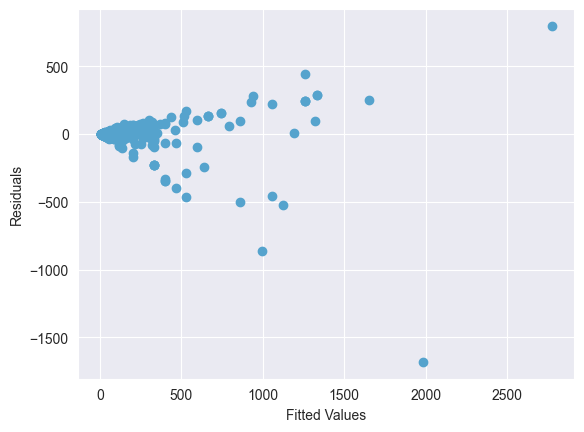

In [17]:
 # Getting the Residuals 
X_ols = OLS_DATA['Actual_Price']
fitted_values = model.predict( X_ols )

residuals = model.resid

 # Fitting a scatter plot of residuals and fitted values 
plt.scatter( fitted_values , residuals )
plt.xlabel( 'Fitted Values' )
plt.ylabel( 'Residuals' )

plt.show()

From the graph we can see that the residuals seem to spread out as the fitted values increase therefore showing a precence of Heteroscedacity which is a violation of an assumption.

Now we will check for Normality of the error term by ploting the histogram  and a qq plot

<function matplotlib.pyplot.show(close=None, block=None)>

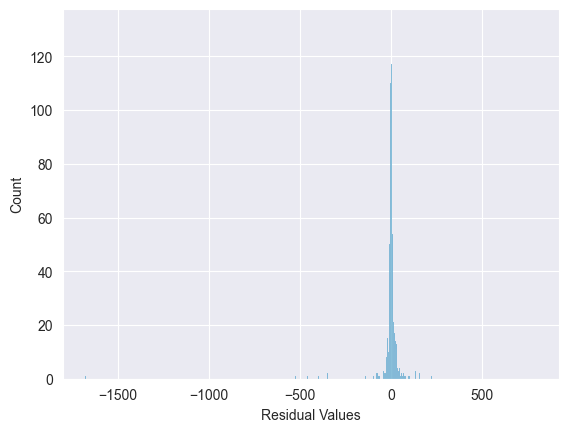

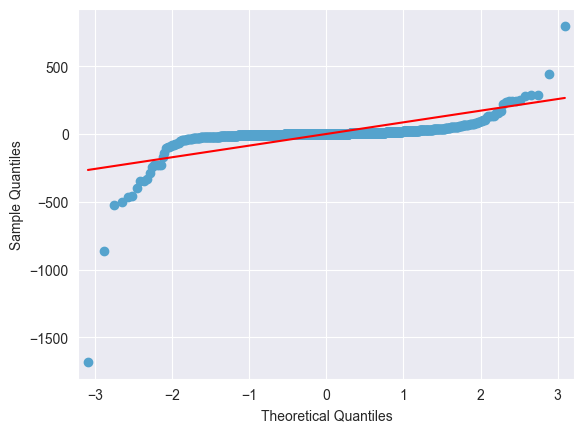

In [18]:
 # Plotting the Histogram
ax = sns.histplot( residuals )
ax.set_xlabel( 'Residual Values' )

 # Plotting the qq plot
ax1 = sm.qqplot( model.resid , line = 's')

plt.show


From the output, we observe that the histogram is left-skewed, suggesting that the error components do not follow a normal distribution. Additionally, the QQ plot indicates that the data points deviate from the reference line, further confirming the non-normality of the residuals. These findings indicate a violation of the normality assumption.

###  **CONCLUSION**

Based on our evaluation, two key assumptions of the simple linear regression model were violated. As a result, we conclude that the simple linear regression model may not be suitable for accurately predicting the discounted price.